### Projekt IUM (zestaw 09, wariant 02)

Autorzy:
- Shpakovich Valeryia 317114
- Wolert Rafał 306020

### Spis treści:
1. Wstęp do projektu
2. Definicja problemu biznesowego 
3. Propozycja rozwiązania problemu biznesowego na podstawie dostępnych danych
    - 3.1 Wnioski dla danych artystów (artists.jsonl)
    - 3.2 Wnioski dla danych utworów (tracks.jsonl)
4. Propozycja rozwiązania
5. Kryteria sukcesu
6. Uwagi
7. Analiza danych
   - 7.1 Załadowanie danych do df
   - 7.2 Analiza danych 
       * zbiór artystów
       * zbiór utworów 
8. (POPRAWIENIE ETAP 1) Wstępne metody asocjacyjne

### 1. Wstęp do projektu

W ramach projektu otrzymano krótki opis biznesowy: “Nie wszyscy nowo dodawani wykonawcy do naszej bazy mają przypisany gatunek muzyczny – musimy jakoś temu zaradzić!”

Dane, które otrzymano od klienta, zawierały:


1. Bazę użytkowników (users.jsonl)

2. Listę wykonawców (artists.jsonl)

3. Listę utworów (tracks.jsonl)

4. Historię sesji użytkowników (sessions.jsonl)

5. Techniczne informacje dotyczące przechowywania plików (track_storage.jsonl)
 
 
 Po krótkiej analizie wstępnej, służącej jako pomoc przy określaniu problemu biznesowego i kryteriów sukcesu, zaobserwowano:

*   Zdecydowano się na wybór danych nr 2 i 3. Pozostałe zbiory nie wnoszą informacji odnośnie wykonawców piosenek oraz samych utworów,
*   W zbiorze listy utworów nie mamy informacji o gatunkach przypisanych do utworów,
*   W zbiorze listy wykonawców mamy wiele gatunków przypisanych do jednego autora,
*   W zbiorze listy wykonawców mamy bardzo dużo podgatunków, które należą do jednego gatunku,
*   W zbiorze listy utworów występuje bezpośredni związek autorów z piosenkami, a zatem gatunków z piosenkami na podstawie tej samej wartości id oraz id_artist odpowiednio w zbiorze artists.jsonl oraz tracks.jsonl

Na podstawie powyższej krótkiej analizy wstępnej określono problem biznesowy.

### 2. Definicja problemu biznesowego

Problemem biznesowym jest brak określonych gatunków muzycznych dla utworów.

Na podstawie powyższych danych, możemy wnioskować o gatunku dla autora muzycznego, tylko na podstawie gatunków muzycznych utworów jego autorstwa.

Poniżej zaprezentowano wizualizację procesu przypisywania gatunków muzycznych do autora na podstawie gatunków muzycznych jego utworów.
![przypisywanie_gatunkow](przypisywanie_gatunkow.png)

### 3. Propozycja rozwiązania problemu biznesowego na podstawie dostępnych danych

#### 3.1 Wnioski dla danych artystów (artists.jsonl)
Poniższe wnioski zaobserwowano na podstawie danych bez usuwania wartości błędnych.
1. Liczność zbioru artystów: 1667 wierszy na 3 kolumny
2. Istotny błąd w kolumnie 'id'. Mamy 320 wierszy z wartością '-1'. Przez to, nie wiemy jakie piosenki należą do danego artysty w zbiorze danych utworów (tracks.jsonl).
3. Istotny błąd w kolumnie 'genres'. Mamy 328 wartości None - przez to nie można określić, w jakim gatunku tworzy dany artysta.

Poniższe wnioski zaobserwowano na podstawie danych z usuwaniem wartości błędnych (tj. usunięto 328 wierszy z wartościami None w 'genres'

1. Łącznie mamy 5545 gatunków w zbiorze.
2. Podgatunków występujących w liczbie 1, 2, 3, 4 mamy łącznie 567. Pojedynczych podgatunków jest jeszcze więcej i mogą stanowić klasę większościową dla zbioru gatunków.
3. 4/5 najbardziej popularnych unikalnych podgatunków odwołuje się do głównego gatunku "pop". Jest to klasa większościowa, która może negatywnie wpłynać na modelowanie.

Wniosek: Potrzeba dla artystów, w których nie występują błędy zarówno w kolumnie 'id' jak i 'genres'. Wtedy, możliwe, że niezbalansowanie danych zaobserwowanie w zbiorze przy usuniętych wartościach None będzie akceptowalne dla zadań modelowania.

#### 3.2 Wnioski dla danych utworów (tracks.jsonl)
Poniższe wnioski zaobserwowano na podstawie danych bez usuwania wartości błędnych.

1. Liczność zbioru to 22412 wiersze na 7 kolumn.
2. Wartości typu None w kolumnach: 'id', 'name', 'popularity', 'id_artist'. Istotne błędy w danych to kolumny: 'name', 'popularity' oraz 'id_artist'. Błędy typu 'id' jesteśmy w stanie uzupełnić generując id, przypisując kolejne cyfry do piosenek - nie jest to rażący błąd danych. 

Brak nazw piosenek w 'name' nie jest możliwy do uzupełnienia przez nasz zespół analityków, nie jesteśmy w stanie wtedy wykryć np.: duplikatów piosenek po nazwie, które mają podobne cechy piosenek takie jak: energy, danceability, key itd.

Brak wskaźnika popularności w 'popularity' - może nie być to kluczowa cecha w przypadku zadań modelowania, jednak ciężko jest uzupełnić tak występujący brak danych reprezentatywnie. Możemy wypełnić braki np.: często występującą wartością, ale ilość braków dla tej kolumny (4436 braków) jest duża.

Celem dalszej analizy, usunięto braki None w trzech kolumnach pozostałych kolumnach (łącznie 13 446 rekordów). Braki w kolumnie 'id' czyli 4480, uzupełniono kolejnymi cyframi od 0.

Poniższe wnioski zaobserwowano na podstawie danych z usuwaniem wartości błędnych (tj. usunięto 13 446 wierszy z wartościami None w trzech kolumnach.

1. Z pozostałych danych, 11 451 rekordów, sprawdziliśmy ile artystów ze zbioru artists.jsonl występuje w zbiorze piosenek jako autorzy. Jest to 9092 artystów, którzy mają odwzorowanie w zbiorze artists.jsonl, a co za tym idzie, mają przypisane gatunki, w których tworzą. 2359 artystów z tracks.jsonl nie znajduje się w zbiorze artists.jsonl

Wniosek: Potrzebny zbiór danych, który nie zawiera braków w 'name', 'popularity', 'id_artist'. Spora część danych, 9092 artystów ze zbioru piosenek ma swoje odwzorowanie w zbiorze artystów, co powinno wystarczyć w celach modelowania.


### 4. Propozycja rozwiązania

1. Proponujemy bardziej uogólniony podział na gatunki. Bez uogólnionego podziału, istnieje bardzo dużo podgatunków w małej liczności w zbiorze. Oznacza to, że model nie będzie w stanie generalizować przypadków gatunków, pojedyncze podgatunki występujące w zbiorze wpływają negatywnie na jego działanie.
W tym przypadku użyjemy **metod asocjacyjnych**, które są w stanie skutecznie powiązać podobne elementy ze sobą i w ten sposób zredukować liczność zbioru.
2.  Mając uogólnione gatunki, jesteśmy w stanie przejść do pierwszego z zadań modelowania:
  - na zbiorze wszystkich piosenek stosujemy **clustering**, celem uzyskania grup, które posiadają cechy charakterystyczne dla każdego gatunku i są związane z rytmicznością, tanecznością, głośnością itd. danego utworu
  - wynikiem clusteringu są grupy, z których w każdej znajdują się piosenki z przypisanymi autorami. Artyści mają przypisane gatunki w których tworzą.
  - na podstawie gatunków, w których artyści tworzą, z pomocą heurystyk, jaki gatunek występuje w grupie najczęściej, określany będzie gatunek całej grupy.

  Dzięki temu, otrzymamy dodatkową informację o gatunku danego utworu.
  Powyższy opis zaprezentowano na poniższym diagramie.

  ![pierwszy_model](pierwszy_model.png)

Dla grupowania danych prawdopodobnie zostanie wykorzystana metoda k-średnich, na podstawie danej mapy: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

3. Drugie zadanie modelowania będzie polegało na:
  - pracy ze zbiorem początkowym, trenującym, ale wzbogaconym o informację o gatunku dla danego utworu,
  - na podstawie tych danych, tworzymy model, który określa gatunek piosenki (zadanie klasyfikacji)

Końcowy model utworzony w ramach drugiego zadania modelowania będzie wykorzystywany "na produkcji". Algorytm użyty do zadania klasyfikacji zostanie określony po otrzymaniu wyników z modelu pierwszego.

Przedstawiona architektura wymaga aktualizacji danych treningowych do modelu 1 i 2, co pewien określony czas.

### 5. Kryteria sukcesu

**Biznesowe:**  

Nowododanym wykonawcom skutecznie przypisywane są gatunki muzyczne. 

**Analityczne:**  

Ostateczne kryterium sukcesu: jak dobrze dobierane są gatunki do konkretnego wykonawcy? Na przykład, na ile prawdopodobieństwo tego, że nasze rozwiązanie przypisze do wykonawcy odpowiedni gatunek, jest lepsze od losowego przypisania. 

Podczas pracy do określenia jakości implementacji i dobranych parametrów zostaną dobrane specyficzne dla problemów clusteringu (grupowania) i klasyfikacji metryki takie jak:
1. dla clusteringu:
  - Silhouette Coefficient
  - Dunn's Index
2. dla klasyfikacji:
  - confusion matrix
  - ROC curve
  - PR curve
  - Log Loss

### 6. Uwagi:
W dalszej części notatnika przeprowadzono analizę danych, na podstawie której oceniono czy dane są wystarczające, czy w danych czegoś brakuje. Należy nadmienić, że finalnie, tak jak powyżej, stwierdzono, że należy przesłać dane bez błędów, które posłużą do dalszej analizy. Z tego względu, w analizie danych nie skupiowano się na przydatności otrzymanych cech, np.: w przypadku zbioru tracks.jsonl. Zostanie to wykonane, po otrzymaniu zbioru niezawierającego błędów.

Poniższa analiza składa się z sekcji:
1. Załadowanie danych do df
2. Analiza danych 
    * zbiór artystów
    * zbiór utworów      

### 7.1 Załadowanie danych do df

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
def load_lines(filename):
    with open(filename) as f:
        lines = f.read().splitlines()
    return lines

In [316]:
artists_lines = load_lines("stare_dane/artists.jsonl")
tracks_lines = load_lines("stare_dane/tracks.jsonl")

In [317]:
artists_lines[:10]

['{"id": "7jVv8c5Fj3E9VhNjxT4snq", "name": "Lil Nas X", "genres": ["country rap", "lgbtq+ hip hop", "pop rap", "queer country"]}',
 '{"id": "0xRXCcSX89eobfrshSVdyu", "name": "MEDUZA", "genres": ["dance pop", "edm", "pop dance", "pop house", "tropical house"]}',
 '{"id": -1, "name": "TheFatRat", "genres": ["speedrun"]}',
 '{"id": "4f7KfxeHq9BiylGmyXepGt", "name": "Tanishk Bagchi", "genres": ["desi pop", "filmi", "modern bollywood"]}',
 '{"id": -1, "name": "Jawsh 685", "genres": ["nz pop"]}',
 '{"id": "523y9KSneKh6APd1hKxLuF", "name": "Master KG", "genres": ["south african house"]}',
 '{"id": "25UNJbwGZSQKvz5cPLWlv3", "name": "Los Dos Carnales", "genres": null}',
 '{"id": "6vTqEFbTtTRJsuIpzZgjxi", "name": "Grupo Menos \\u00c9 Mais", "genres": ["pagode", "pagode novo"]}',
 '{"id": "44mEtidu0VdRkIqO4IbkNa", "name": "Marca MP", "genres": ["corrido", "corridos tumbados", "nuevo regional mexicano", "regional mexican", "sierreno"]}',
 '{"id": -1, "name": "Guilherme & Benuto", "genres": ["serta

In [318]:
tracks_lines[:10]

['{"id": "0RNxWy0PC3AyH4ThH3aGK6", "name": null, "popularity": null, "duration_ms": 201467, "explicit": 0, "id_artist": "19eLuQmk9aCobbVDHc6eek", "release_date": "1929", "danceability": 0.673, "energy": 0.377, "key": 0, "loudness": -14.141, "speechiness": 0.0697, "acousticness": 0.586, "instrumentalness": 0.0, "liveness": 0.332, "valence": 0.713, "tempo": 88.973}',
 '{"id": "2W889aLIKxULEefrleFBFI", "name": "Someone to Watch Over Me", "popularity": 54, "duration_ms": 198000, "explicit": 0, "id_artist": "1Mxqyy3pSjf8kZZL4QVxS0", "release_date": "1943", "danceability": 0.204, "energy": 0.151, "key": 2, "loudness": -17.842, "speechiness": 0.0418, "acousticness": 0.947, "instrumentalness": 9.15e-06, "liveness": 0.321, "valence": 0.134, "tempo": 91.783}',
 '{"id": "4Pnzw1nLOpDNV6MKI5ueIR", "name": null, "popularity": 55, "duration_ms": 199000, "explicit": 0, "id_artist": "1Mxqyy3pSjf8kZZL4QVxS0", "release_date": "1944", "danceability": 0.295, "energy": 0.0826, "key": 1, "loudness": -19.569,

In [319]:
artists_df = pd.DataFrame(artists_lines)
tracks_df = pd.DataFrame(tracks_lines)

In [320]:
artists_df

,0
0,"{""id"": ""7jVv8c5Fj3E9VhNjxT4snq"", ""name"": ""Lil ..."
1,"{""id"": ""0xRXCcSX89eobfrshSVdyu"", ""name"": ""MEDU..."
2,"{""id"": -1, ""name"": ""TheFatRat"", ""genres"": [""sp..."
3,"{""id"": ""4f7KfxeHq9BiylGmyXepGt"", ""name"": ""Tani..."
4,"{""id"": -1, ""name"": ""Jawsh 685"", ""genres"": [""nz..."
...,...
1662,"{""id"": ""6AMd49uBDJfhf30Ak2QR5s"", ""name"": ""Coi ..."
1663,"{""id"": ""6qgnBH6iDM91ipVXv28OMu"", ""name"": ""KAYT..."
1664,"{""id"": ""5q8HGNo0BjLWaTAhRtbwxa"", ""name"": ""Bran..."
1665,"{""id"": -1, ""name"": ""Bethel Music"", ""genres"": [..."


In [321]:
tracks_df

,0
0,"{""id"": ""0RNxWy0PC3AyH4ThH3aGK6"", ""name"": null,..."
1,"{""id"": ""2W889aLIKxULEefrleFBFI"", ""name"": ""Some..."
2,"{""id"": ""4Pnzw1nLOpDNV6MKI5ueIR"", ""name"": null,..."
3,"{""id"": ""7GLmfKOe5BfOXk7334DoKt"", ""name"": ""Satu..."
4,"{""id"": ""6kD1SNGPkfX9LwaGd1FG92"", ""name"": ""Put ..."
...,...
22407,"{""id"": ""0LcNMuOiULmxJK3bdHTfDF"", ""name"": ""Miss..."
22408,"{""id"": ""1uviKYHZuM4uINK33F7sCt"", ""name"": ""Fix ..."
22409,"{""id"": null, ""name"": ""Lotus Inn"", ""popularity""..."
22410,"{""id"": ""27kcZEJvhkb1rzZS9gCpdA"", ""name"": null,..."


In [322]:
artists_df.columns = ['json line']
tracks_df.columns = ['json line']

# utworzenie słownika na każdym elemencie kolumny json line
loaded_json_artists = artists_df['json line'].apply(json.loads)
loaded_json_tracks = tracks_df['json line'].apply(json.loads)


In [323]:
artists_df = pd.json_normalize(loaded_json_artists)
tracks_df = pd.json_normalize(loaded_json_tracks)

In [324]:
artists_df

,id,name,genres
0,7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,"[country rap, lgbtq+ hip hop, pop rap, queer c..."
1,0xRXCcSX89eobfrshSVdyu,MEDUZA,"[dance pop, edm, pop dance, pop house, tropica..."
2,-1,TheFatRat,[speedrun]
3,4f7KfxeHq9BiylGmyXepGt,Tanishk Bagchi,"[desi pop, filmi, modern bollywood]"
4,-1,Jawsh 685,[nz pop]
...,...,...,...
1662,6AMd49uBDJfhf30Ak2QR5s,Coi Leray,"[pop r&b, r&b, trap queen, viral rap]"
1663,6qgnBH6iDM91ipVXv28OMu,KAYTRANADA,"[escape room, indie soul, lgbtq+ hip hop]"
1664,5q8HGNo0BjLWaTAhRtbwxa,Brantley Gilbert,"[contemporary country, country, country road, ..."
1665,-1,Bethel Music,"[ambient worship, ccm, christian music, deep c..."


In [325]:
tracks_df

,id,name,popularity,duration_ms,explicit,id_artist,release_date,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0RNxWy0PC3AyH4ThH3aGK6,None,NaN,201467,0,19eLuQmk9aCobbVDHc6eek,1929,0.673,0.3770,0,-14.141,0.0697,0.5860,0.000000,0.3320,0.7130,88.973
1,2W889aLIKxULEefrleFBFI,Someone to Watch Over Me,54.0,198000,0,1Mxqyy3pSjf8kZZL4QVxS0,1943,0.204,0.1510,2,-17.842,0.0418,0.9470,0.000009,0.3210,0.1340,91.783
2,4Pnzw1nLOpDNV6MKI5ueIR,None,55.0,199000,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.295,0.0826,1,-19.569,0.0367,0.9840,0.000358,0.1560,0.1690,128.600
3,7GLmfKOe5BfOXk7334DoKt,Saturday Night (Is The Loneliest Night In The ...,NaN,163000,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.561,0.3350,9,-11.093,0.0499,0.8400,0.000002,0.7880,0.5900,126.974
4,6kD1SNGPkfX9LwaGd1FG92,Put Your Dreams Away (For Another Day),NaN,186173,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.197,0.0546,1,-22.411,0.0346,0.9500,0.276000,0.1520,0.1000,90.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22407,0LcNMuOiULmxJK3bdHTfDF,Missing You,65.0,214987,0,7gAppWoH7pcYmphCVTXkzs,2019-04-19,0.537,0.6470,2,-7.370,0.0519,0.1680,0.000000,0.1080,0.5310,79.770
22408,1uviKYHZuM4uINK33F7sCt,Fix It to Break It,70.0,198799,0,7okSU80WTrn4LXlyXYbX3P,2020-03-27,0.493,0.4610,2,-8.524,0.0456,0.8450,0.000000,0.1150,0.3500,51.414
22409,None,Lotus Inn,63.0,195868,0,2jnIB6XdLvnJUeNTy5A0J2,2020-12-04,0.578,0.7400,2,-5.080,0.0721,0.0119,0.000000,0.1800,0.4950,155.984
22410,27kcZEJvhkb1rzZS9gCpdA,None,67.0,202355,0,7okSU80WTrn4LXlyXYbX3P,2020-11-27,0.590,0.4430,0,-5.662,0.0722,0.6180,0.000000,0.1100,0.3420,149.447


### 7.2 Analiza danych

#### Zbiór artystów

Pierwszą rzeczą w analizie zbioru artystów jest sprawdzenie rozmiaru posiadanych danych, informacji o kolumnach za pomocą funkcji shape i info.

In [326]:
artists_df.shape

(1667, 3)

In [327]:
artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1667 non-null   object
 1   name    1667 non-null   object
 2   genres  1339 non-null   object
dtypes: object(3)
memory usage: 39.2+ KB


Użyto także funkcji `describe`, która pozwoli nam użyć metryk celem podsumowania kolumn występujących w DataFramie. Sprawdzono także występujące wartości typu None w danych.

In [328]:
artists_df.describe(include=object)

,id,name,genres
count,1667,1667,1339
unique,1347,1667,1118
top,-1,Lil Nas X,"[k-pop, k-pop boy group]"
freq,321,1,11


In [329]:
artists_df.isnull().sum()

id          0
name        0
genres    328
dtype: int64

Można zauważyć kilka rzeczy na podstawie `describe` i podsumowania wartości None:
1. Unikalnych wartości dla kolumny 'id' jest 1347, podczas gdy wszystkich wierszy (oraz wartości dla kolumny 'id') jest 1667. Oznacza to, że prawdopodobnie mamy do czynienia z anomalią/błędem w danych.
2. Unikalnych wartości dla kolumny 'genres' jest 1118, a wszystkich wartości 1339, podczas gdy rozmiar DataFrame to 1667 x 3. Oznacza to zarówno możliwe błędy w danych lub inną formę reprezentacji danych niż standardowo jedna wartość w jednej komórce. Na podstawie funkcji `isnull()` wnioskujemy o 328 wartościach typu None w kolumnie 'genres', co łącznie daje nam 1667 wartości.
3. Unikalnych wartości dla kolumny 'name' jest 1667 - prawdopodobnie nie mamy tutaj błędów w danych, możliwe problemy z nazwami/imionami artystów w nietypowym systemie kodowania (np.: nazwy artystów w języku chińskim).

Sprawdzimy teraz każdą obserwację.
Zajmijmy się kolumną 'id'. Sprawdzimy w jakiej formie są dane w tej kolumnie oraz sprawdzimy ewentualne błędy.


In [330]:
artists_df['id']

0       7jVv8c5Fj3E9VhNjxT4snq
1       0xRXCcSX89eobfrshSVdyu
2                           -1
3       4f7KfxeHq9BiylGmyXepGt
4                           -1
                 ...          
1662    6AMd49uBDJfhf30Ak2QR5s
1663    6qgnBH6iDM91ipVXv28OMu
1664    5q8HGNo0BjLWaTAhRtbwxa
1665                        -1
1666    46MWeeHNVMYRIIofQBEX98
Name: id, Length: 1667, dtype: object

In [331]:
artists_df[artists_df['id'].duplicated()]['id'].value_counts()

-1    320
Name: id, dtype: int64

In [332]:
artists_df["id"].value_counts().head()

-1                        321
7jVv8c5Fj3E9VhNjxT4snq      1
1moxjboGR7GNWYIMWsRjgG      1
49tQo2QULno7gxHutgccqF      1
37M5pPGs6V1fchFJSgCguX      1
Name: id, dtype: int64

Pierwsze sprawdzenie już daje nam możliwą przyczynę, błąd danych w kolumnie 'id'. Policzyliśmy występujące duplikaty w wartościach i wyświetliliśmy je. Mamy 320 wartości "-1" w kolumnie 'id'. Stąd wcześniej widzieliśmy jedynie 1347 unikalnych wartości w kolumnie 'id'. Łącznie daję nam 1667 wartości, tyle ile mieliśmy wierszy w DataFrame.

Z punktu widzenia modelowania, jest to istotny błąd w danych. Nie wiemy wtedy, jakie piosenki należą do danego artysty w zbiorze danych tracks.

Zajmijmy się teraz drugą obserwacją i sprawdźmy kolumnę z gatunkami artystów.

In [333]:
artists_df[artists_df['genres'].isna()]

,id,name,genres
6,25UNJbwGZSQKvz5cPLWlv3,Los Dos Carnales,None
10,0n6sKrG0xKAf8xmdqeNGke,Los Legendarios,None
11,0IxgA9wO4Op3CSnPlhfwV1,Kevin,None
18,0vLsqW05dyLvjuKKftAEGA,Die drei ??? Kids,None
29,-1,CORPSE,None
...,...,...,...
1627,3YQKmKGau1PzlVlkL1iodx,Twenty One Pilots,None
1631,4oUHIQIBe0LHzYfvXNW4QM,Morgan Wallen,None
1636,3Y2MLcrD3ZQXRXmtn4fZQx,SpotemGottem,None
1643,55fhWPvDiMpLnE4ZzNXZyW,Noah Cyrus,None


Mamy 328 wartości None, które są poważnymi błędami w danych. Nie jesteśmy wtedy w stanie użyć takich danych do dalszej analizy związanej z piosenkami oraz artystami, nie mając gatunków przypisanych do artystów.
Dla dalszej analizy danych związanych z gatunkami, usunięto 328 rekordów, które są typu None. 

In [334]:
artists_df_genres = artists_df[~artists_df['genres'].isna()]

In [335]:
artists_df_genres.reset_index(inplace=True)

In [336]:
artists_df_genres.shape

(1339, 4)

In [337]:
artists_df_genres.describe()

,index
count,1339.000000
mean,833.455564
std,483.064750
min,0.000000
25%,415.000000
50%,830.000000
75%,1257.500000
max,1666.000000


In [338]:
# sprawdzenie czy listy w kolumnie 'genres' są listami, a nie np.: stringami
for i, l in enumerate(artists_df_genres["genres"]):
    if not isinstance(l, list):
        print("list",i,"is",type(l))

In [339]:
def check_list(_list):
    for element in _list:
        if not isinstance(element, str):
            return True
        else:
            return False

In [340]:
artists_df_genres[artists_df_genres['genres'].apply(check_list)]

,index,id,name,genres


Mamy do czynienia z kolumną, w której wartości są listami, w których mamy elementy typu string. Wiemy, że usunęliśmy 328 rekordów związanych z wartością None w kolumnie 'genres'. Jest to jednak bezpośrednie sprawdzenie, że listy z gatunkami nie ma w danej komórce, stąd dodatkowo sprawdzamy, czy każdy element w liście jest typu string.
Sprawdźmy teraz, jakie gatunki mamy w 1339 wierszach, które nam pozostały.

In [341]:
def flatten_series(series):
    return pd.Series([x for _list in series for x in _list])

In [342]:
flatten_genres = flatten_series(artists_df_genres['genres'])

In [343]:
flatten_genres_size = flatten_genres.size
flatten_genres_size

5545

In [344]:
flatten_genres.value_counts()

pop                 281
dance pop           206
pop rap             141
rap                 132
post-teen pop       128
                   ... 
uk americana          1
modern folk rock      1
merseybeat            1
panamanian pop        1
deep ccm              1
Length: 774, dtype: int64

In [345]:
flatten_genres.value_counts().head(10)

pop              281
dance pop        206
pop rap          141
rap              132
post-teen pop    128
rock             111
latin            105
hip hop          103
trap              83
trap latino       83
dtype: int64

In [346]:
sum(flatten_genres.value_counts() == 1)

331

In [347]:
sum(flatten_genres.value_counts() == 2)

132

In [348]:
sum(flatten_genres.value_counts() == 3)

71

In [349]:
sum(flatten_genres.value_counts() == 4)

33

In [350]:
temp = flatten_genres.value_counts() == 1

In [351]:
temp[temp].index

Index(['chicano rap', 'destroy techno', 'australian psych', 'future garage',
       'deep underground hip hop', 'japanese soul', 'moombahton',
       'celtic rock', 'south african house', 'bow pop',
       ...
       'new age piano', 'reading', 'future house', 'german romanticism',
       'kansas city hip hop', 'uk americana', 'modern folk rock', 'merseybeat',
       'panamanian pop', 'deep ccm'],
      dtype='object', length=331)

In [352]:
flatten_genres.isin(['pop dance']).value_counts()

False    5472
True       73
dtype: int64

In [353]:
flatten_genres.isin(['dance pop']).value_counts()

False    5339
True      206
dtype: int64

Możemy zauważyć, że w gatunkach mamy bardzo mało gatunków, które są jednoznacznie określone. Oznacza to, że istnieje wiele podgatunków, które zaliczają się do jednego gatunku. Na podstawie obecnych danych, trzeba pogrupować je w jednolite gatunki, tj. przykładowo pop, dance pop, pop rap powinny tworzyć jeden gatunek pop - bez takiego przypisywania podgatunków do gatunków mamy bardzo mało informacji o podgatunkach występujących w liczbie np.: 1, 2, 3, 4 (jest ich łącznie 567 w porównaniu do 5545 wszystkich gatunków).

Widzimy jednak, że mamy przeważającą liczbę podgatunków związanych z gatunkiem pop, 4 na 5 najczęściej występujących. Jest to w tym przypadku klasa większościowa, która może negatywnie wpłynąć na modelowanie.

 Problemem są podgatunki takie jak np.: pop rap, ponieważ przy użyciu heurystyk: przykładowo sprawdzania czy w gatunku istnieje string "pop" lub "rap" i na tej podstawie dodawania podgatunku do gatunku, mielibyśmy sytuację, w której podgatunek pop rap należy zarówno do gatunku pop jak i rap. Mamy także problem w przypadku bezpośrednich heurystyk z podgatunkami, które w rzeczywistości oznaczają jeden podgatunek, jak np.: "dance pop" jest takim samym podgatunkiem jak "pop dance".

 Jedną z możliwości jest zastosowanie pierwszego modelu związanego z metodami asocjacyjnymi. Dzięki nim, będziemy w stanie zredukować liczbę występujących podgatunków i wprowadzić kilkanaście głównych gatunków do kolejnego modelu.

 Nie zauważono błędów związanych z kodowaniem nazw w utf-8. Mamy ich 99 w kolumnie "name", ale są poprawnie wyświetlane.



#### Zbiór utworów

Pierwszą rzeczą w analizie zbiorze piosenek jest sprawdzenie rozmiaru posiadanych danych, informacji o kolumnach za pomocą funkcji shape i info.

In [354]:
tracks_df.shape

(22412, 17)

In [355]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22412 entries, 0 to 22411
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                17932 non-null  object 
 1   name              17869 non-null  object 
 2   popularity        17976 non-null  float64
 3   duration_ms       22412 non-null  int64  
 4   explicit          22412 non-null  int64  
 5   id_artist         17945 non-null  object 
 6   release_date      22412 non-null  object 
 7   danceability      22412 non-null  float64
 8   energy            22412 non-null  float64
 9   key               22412 non-null  int64  
 10  loudness          22412 non-null  float64
 11  speechiness       22412 non-null  float64
 12  acousticness      22412 non-null  float64
 13  instrumentalness  22412 non-null  float64
 14  liveness          22412 non-null  float64
 15  valence           22412 non-null  float64
 16  tempo             22412 non-null  float6

In [356]:
tracks_df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,17976.000000,2.241200e+04,22412.000000,22412.000000,22412.000000,22412.000000,22412.000000,22412.000000,22412.000000,22412.000000,22412.000000,22412.000000,22412.000000
mean,61.403204,2.301383e+05,0.166607,0.599096,0.648017,5.278824,-7.196227,0.082914,0.267758,0.040220,0.193141,0.518000,121.911945
std,8.063571,7.209562e+04,0.372633,0.158259,0.209577,3.558813,3.738098,0.089317,0.276111,0.152828,0.167943,0.244477,29.615254
min,51.000000,3.062200e+04,0.000000,0.000000,0.000103,0.000000,-44.410000,0.000000,0.000001,0.000000,0.012000,0.000000,0.000000
25%,55.000000,1.914930e+05,0.000000,0.495000,0.508000,2.000000,-8.614500,0.033900,0.029800,0.000000,0.094400,0.325000,97.988000
50%,60.000000,2.206670e+05,0.000000,0.608000,0.672000,5.000000,-6.393000,0.046300,0.165000,0.000003,0.125000,0.512000,120.041000
75%,67.000000,2.562400e+05,0.000000,0.715000,0.816000,8.000000,-4.850000,0.086000,0.455000,0.000523,0.240000,0.713000,140.078000
max,99.000000,4.120258e+06,1.000000,0.980000,0.999000,11.000000,0.642000,0.944000,0.996000,0.998000,0.997000,0.991000,220.099000


In [357]:
tracks_df.describe(include=object)

,id,name,id_artist,release_date
count,17932,17869,17945,22412
unique,17932,14689,1392,3907
top,0RNxWy0PC3AyH4ThH3aGK6,Animals,06HL4z0CvFAxyc27GXpf02,2013-01-01
freq,1,10,255,268


In [358]:
tracks_df.isnull().sum()

id                  4480
name                4543
popularity          4436
duration_ms            0
explicit               0
id_artist           4467
release_date           0
danceability           0
energy                 0
key                    0
loudness               0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
dtype: int64

Możemy zauważyć, że występują wartości typu None w czterech kolumnach: "id", "name", "popularity", "id_artist". Błędy typu id jesteśmy w stanie uzupełnić generując inne id np.: przypisując brakującym piosenkom kolejne cyfry, samo id piosenki nie jest nam szczególnie potrzebne w przypadku modelowania. Istotnymi błędami są wartości None w pozostałych trzech kolumnach. 

1. Kolumna "name": brak nazw dla piosenek nie jest możliwy do uzupełnienia, ponieważ możemy mieć rekordy o podobnych cechach takich jak energy, danceability, key, loudness itd. dla takich samych piosenek - brak możliwości wykrycia duplikatów piosenek.
2. Kolumna "id_artist": brak id artysty uniemożliwia nam mapowanie artystów i gatunków należących do nich do ich piosenek. Jest to istotny błąd, który uniemożliwia użycie tych danych do modelowania.
3. Kolumna "popularity": brak popularności dla danej piosenki może nie być kluczową cechą w przypadku modelowania związanego z przypisywaniem gatunków do autorów, jest to jednak brak, który ciężko wypełnić bez ponownego przesłania nowych danych.

Celem dalszej analizy cech, spróbujmy usunąć braki związane z trzema wymienionymi kolumnami. Czwartą kolumnę, "id" sprawdzimy po usunięciu braków w trzech kolumnach.

In [359]:
tracks_df_clean = tracks_df[~tracks_df['name'].isna()]
tracks_df_clean = tracks_df_clean[~tracks_df_clean['id_artist'].isna()]
tracks_df_clean = tracks_df_clean[~tracks_df_clean['popularity'].isna()]

In [360]:
tracks_df_clean.isnull().sum()

id                  2303
name                   0
popularity             0
duration_ms            0
explicit               0
id_artist              0
release_date           0
danceability           0
energy                 0
key                    0
loudness               0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
dtype: int64

In [361]:
tracks_df_clean.reset_index(inplace=True) # reset indexu celem poprawnego zliczania danych
tracks_df_clean.pop('index')

0            1
1            6
2            8
3            9
4           10
         ...  
11446    22402
11447    22405
11448    22407
11449    22408
11450    22409
Name: index, Length: 11451, dtype: int64

In [362]:
tracks_df_clean

,id,name,popularity,duration_ms,explicit,id_artist,release_date,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2W889aLIKxULEefrleFBFI,Someone to Watch Over Me,54.0,198000,0,1Mxqyy3pSjf8kZZL4QVxS0,1943,0.204,0.1510,2,-17.842,0.0418,0.9470,0.000009,0.3210,0.1340,91.783
1,5DIVWgTeJ2fPIxaY9e7ZKn,I've Got A Crush On You,56.0,196440,0,5V0MlUE1Bft0mbLlND7FJz,1950-09-11,0.455,0.1060,2,-14.086,0.0422,0.9860,0.000000,0.1220,0.2580,66.807
2,0Hsc0sIaxOxXBZbT3ms2oj,In The Wee Small Hours Of The Morning - Remast...,60.0,180933,0,1Mxqyy3pSjf8kZZL4QVxS0,1955,0.290,0.0874,0,-16.119,0.0346,0.8560,0.000957,0.1090,0.0734,114.997
3,3aEJMh1cXKEjgh52claxQp,I've Got You Under My Skin - Remastered 1998,68.0,223760,0,1Mxqyy3pSjf8kZZL4QVxS0,1956-03,0.585,0.2470,1,-12.612,0.0400,0.4520,0.000009,0.1070,0.5910,127.150
4,None,You Make Me Feel So Young - Remastered 1998,66.0,177400,0,1Mxqyy3pSjf8kZZL4QVxS0,1956-03,0.577,0.3060,9,-11.559,0.0427,0.3830,0.000000,0.1800,0.5680,125.166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11446,6rsm9NTgl9kKPatf7S1yCS,Talk,61.0,190347,0,2jnIB6XdLvnJUeNTy5A0J2,2018-08-31,0.795,0.7000,6,-5.221,0.1070,0.0588,0.000000,0.0977,0.7980,120.002
11447,None,Soothing Dog Music,56.0,45733,0,1Cj9j44XMhQeNHAwWJRCKd,2018-12-24,0.278,0.0614,5,-20.268,0.0474,0.9930,0.961000,0.1240,0.1320,75.139
11448,0LcNMuOiULmxJK3bdHTfDF,Missing You,65.0,214987,0,7gAppWoH7pcYmphCVTXkzs,2019-04-19,0.537,0.6470,2,-7.370,0.0519,0.1680,0.000000,0.1080,0.5310,79.770
11449,1uviKYHZuM4uINK33F7sCt,Fix It to Break It,70.0,198799,0,7okSU80WTrn4LXlyXYbX3P,2020-03-27,0.493,0.4610,2,-8.524,0.0456,0.8450,0.000000,0.1150,0.3500,51.414


In [363]:
tracks_df_clean_rows_size = tracks_df_clean.shape[0]
tracks_df_clean_rows_size

11451

In [364]:
tracks_df_clean_rows = np.arange(tracks_df_clean_rows_size)
tracks_df_clean_rows = pd.Series(tracks_df_clean_rows)

In [365]:
tracks_df_clean['id'].fillna(tracks_df_clean_rows, inplace=True)

In [366]:
tracks_df_clean.isnull().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
id_artist           0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

Uzupełniono brakujące 2303 id kolejnymi cyframi od 0 do 11450. Nastąpiła znaczna redukcja danych, z 22412 do 11451. Sprawdźmy także, ile artystów ze zbioru artystów matchuje się w piosenkach (po polu id_artist).

In [367]:
(artists_df['id'] == -1).value_counts()

False    1346
True      321
Name: id, dtype: int64

Mamy jednak 321 artystów bez id, które celem dalszej analizy musimy usunąć, ponieważ nie znajdziemy dla nich matchy w zbiorze piosenek.

In [368]:
artists_df = artists_df[~(artists_df['id'] == -1)]
artists_df.reset_index(inplace=True)


In [369]:
artists_df.drop('index', inplace=True, axis=1)

C:\Users\rwole\AppData\Local\Temp\ipykernel_14016\683162473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artists_df.drop('index', inplace=True, axis=1)


In [370]:
artists_df

,id,name,genres
0,7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,"[country rap, lgbtq+ hip hop, pop rap, queer c..."
1,0xRXCcSX89eobfrshSVdyu,MEDUZA,"[dance pop, edm, pop dance, pop house, tropica..."
2,4f7KfxeHq9BiylGmyXepGt,Tanishk Bagchi,"[desi pop, filmi, modern bollywood]"
3,523y9KSneKh6APd1hKxLuF,Master KG,[south african house]
4,25UNJbwGZSQKvz5cPLWlv3,Los Dos Carnales,None
...,...,...,...
1341,3b8QkneNDz4JHKKKlLgYZg,Florida Georgia Line,"[contemporary country, country, country pop, c..."
1342,6AMd49uBDJfhf30Ak2QR5s,Coi Leray,"[pop r&b, r&b, trap queen, viral rap]"
1343,6qgnBH6iDM91ipVXv28OMu,KAYTRANADA,"[escape room, indie soul, lgbtq+ hip hop]"
1344,5q8HGNo0BjLWaTAhRtbwxa,Brantley Gilbert,"[contemporary country, country, country road, ..."


In [371]:
artists_ids = artists_df['id'].to_list()
artists_ids[:10]

['7jVv8c5Fj3E9VhNjxT4snq',
 '0xRXCcSX89eobfrshSVdyu',
 '4f7KfxeHq9BiylGmyXepGt',
 '523y9KSneKh6APd1hKxLuF',
 '25UNJbwGZSQKvz5cPLWlv3',
 '6vTqEFbTtTRJsuIpzZgjxi',
 '44mEtidu0VdRkIqO4IbkNa',
 '0n6sKrG0xKAf8xmdqeNGke',
 '0IxgA9wO4Op3CSnPlhfwV1',
 '4rTv3Ejc7hKMtmoBOK1B4T']

In [372]:
(tracks_df_clean['id_artist'].isin(artists_ids)).value_counts()

True     9092
False    2359
Name: id_artist, dtype: int64

Możemy zauważyć, że mamy 9092 piosenek, u których jesteśmy w stanie stwierdzić, w jakim mniej więcej gatunku tworzy artysta i na tej podstawie wnioskować o gatunku piosenki. Jeśli w ramach naszego pierwszego modelowania mielibyśmy określone gatunki z wliczonymi podgatunkami, to możemy użyć 9092 z tych danych, aby określić gatunek artysty na podstawie jego piosenki. 2359 danych nie jest użyteczne w kontekście naszego założonego modelowania, ponieważ będziemy mieć sytuację, w której piosenka nie ma przypisanego autora z naszego zbioru autorów, a co za tym idzie, nie będziemy mieli informacji o gatunkach przypisanych do autora.

### 8. (POPRAWIENIE ETAP 1) Analiza nowych danych oraz preprocessing

Celem przedstawienia wstępnych danych do zaproponowanego modelu oraz skonstruowania modelu bazowego, należy:
- 8.1 sprawdzić kompletność danych (zbiór artists.jsonl oraz tracks.jsonl)
- 8.2 określić główne gatunki i zmniejszyć ich liczebność
- 8.3 przypisać gatunki autorów do ich piosenek

#### 8.1 Sprawdzenie kompletności danych

Załadowanie danych - zostaną napisane ponownie te same funkcje, celem zachowania ciągłości notatnika - nie chcieliśmy podmieniać poprzednich linijek, ponieważ wnioski do nich odnosiły się do starych danych.

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def load_lines(filename):
    with open(filename) as f:
        lines = f.read().splitlines()
    return lines

In [5]:
artists_lines = load_lines("nowe_dane/artists.jsonl")
tracks_lines = load_lines("nowe_dane/tracks.jsonl")

artists_df = pd.DataFrame(artists_lines)
tracks_df = pd.DataFrame(tracks_lines)

In [10]:
artists_df.columns = ['json line']
tracks_df.columns = ['json line']

# utworzenie słownika na każdym elemencie kolumny json line
loaded_json_artists = artists_df['json line'].apply(json.loads)
loaded_json_tracks = tracks_df['json line'].apply(json.loads)

artists_df = pd.json_normalize(loaded_json_artists)
tracks_df = pd.json_normalize(loaded_json_tracks)

In [11]:
artists_df

,id,name,genres
0,72578usTM6Cj5qWsi471Nc,Raghu Dixit,"[filmi, indian folk, indian rock, kannada pop]"
1,7b6Ui7JVaBDEfZB9k6nHL0,The Local Train,"[desi pop, hindi indie, indian indie, indian r..."
2,4bvGDTEPFnllKiJaEZGuXk,Achint,[indian folk]
3,0n4a5imdLBN24fIrBWoqrv,Because,"[opm, pinoy hip hop, pinoy r&b, pinoy trap, ta..."
4,4gdMJYnopf2nEUcanAwstx,Anuv Jain,"[hindi indie, indian indie, indian singer-song..."
...,...,...,...
27519,2My6j5BEgOi8VHi5WGVyfw,Apocalypshit Army,[italian hip hop]
27520,0bzW9kGcTyMxXuG9dUdj7E,GRANDGEORGE,[belgian pop]
27521,4iS19hLpsgRd8jLPKI4Ni3,Blissonic,[thai indie]
27522,3JGC3LkYrwlrTscixVwY72,พราว,[thai indie]


In [12]:
tracks_df

,id,name,popularity,duration_ms,explicit,id_artist,release_date,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,708ZiYL3ydBWHS2a7gvJB3,031 - Der Schatz im Silbersee I - Teil 39,13,75040,0,0PCtW4w0RN89andUBQ3TVv,1968-09-11,0.740,0.891,7,-7.480,0.8920,0.8390,0.000000,0.8690,0.557,51.496
1,48SFtLr5URCI97X2Ynfdnc,Par Avion (Live) ( 2014 - Remaster) - Live; 20...,0,291227,0,2yTUYhIf8fxptTIy3KLuJD,2014,0.603,0.517,6,-8.504,0.0235,0.6950,0.000003,0.7440,0.327,96.181
2,1y0U0HAe5QfTRzOsz74bOt,My Foolish Heart,25,166080,0,338mC0yGyX0C9of8QMJ5hK,1950-01-01,0.313,0.116,0,-12.645,0.0319,0.9530,0.331000,0.1610,0.255,74.071
3,2TlbZ8JhF9ORa7lJylxABw,Kathysterisi,14,244133,0,5A4ExW2nMBFRy2JDoYUcUE,1998,0.958,0.635,11,-7.853,0.2590,0.1670,0.000000,0.3620,0.866,108.024
4,7ij5kN8jwXr8fZD54M0xb6,Aleni Aleni,51,235974,0,48CUA59SDed3IdCctKndud,2015,0.684,0.839,4,-6.457,0.0658,0.1200,0.000000,0.3540,0.580,128.051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129643,59nszNIEDpnOS0prsKudPb,最真的夢,16,214773,0,6wcIBaOvA9XNGgPujYZZ7L,1990-02-05,0.633,0.345,4,-15.231,0.0291,0.4110,0.000028,0.3610,0.368,132.691
129644,0xiHNGGiSfrFfOJZGpxpJY,By My Side,61,213667,0,04u3fc37nHFKN7GJTSIwI8,2017-08-11,0.295,0.417,6,-8.002,0.0307,0.2220,0.000006,0.1480,0.135,64.687
129645,4peXvhLT61oP9leXdPQ36B,Cu Cu Rru Cu Cu Paloma,49,208467,0,4etuCZVdP8yiNPn4xf0ie5,1978,0.347,0.216,8,-15.215,0.0315,0.6720,0.000118,0.0738,0.478,108.566
129646,2pS2IdtMXpvaEONreUlSAo,No Quiero Saber - 2000 Mix,26,214827,0,6IE6z7DcZIT4Ml3Fh5Ivch,1990,0.784,0.821,0,-7.621,0.0423,0.0229,0.000007,0.1760,0.885,119.609


Zbiór autorów

In [21]:
artists_df.shape

(27524, 3)

In [22]:
artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27524 entries, 0 to 27523
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      27524 non-null  object
 1   name    27524 non-null  object
 2   genres  27524 non-null  object
dtypes: object(3)
memory usage: 645.2+ KB


In [23]:
artists_df.isnull().sum()


id        0
name      0
genres    0
dtype: int64

In [24]:
artists_df.describe(include=object)

,id,name,genres
count,27524,27524,27524
unique,27524,27416,13582
top,72578usTM6Cj5qWsi471Nc,TNT,[indonesian pop]
freq,1,4,78


Widzimy, że duplikaty występują w imionach artystów (104). Sprawdźmy je.

In [28]:
artists_df[artists_df['name'].duplicated()]['name'].value_counts()

TNT                  3
Sebastian            2
Kali                 2
Omega                1
Little River Band    1
                    ..
Revolver             1
Cecilia              1
Grupo Maravilla      1
Los Mismos           1
Marc Antoine         1
Name: name, Length: 104, dtype: int64

Widzimy, że są to przypadki, w których mamy np.: 4 (liczone od indeksu 0) duplikaty tego samego artysty (TNT), kolejne wartości są jednak podwójnymi duplikatami. Możemy sprawdzić jeszcze, czy w obrębie duplikatu danego artystu, mamy zróżnicowane gatunki dla artysty.

In [34]:
artists_df[artists_df['name'].duplicated()]['name'].unique()

array(['Gloria', 'TNT', 'Aurora', 'Jóhann G. Jóhannsson', 'Haze',
       'Nicole', 'Motorpsycho', 'Diesel', 'Boi Bumbá Garantido', 'Doda',
       'Yasmine', 'Talisman', 'Dorian', 'Medina', 'The Sun', 'ฟรุ๊ตตี้',
       'Loso', 'Taxi', 'Emrah', 'Alice', '江玲', 'Kaleidoscope',
       'Butterfingers', 'Space', 'Bent', 'Sasha', 'Deluxe', 'Cactus',
       'Los Mismos', 'Grupo Maravilla', 'Cecilia', 'Revolver',
       'Los Hijos Del Rey', 'Soraya', 'Karina', 'Matanza', '青山',
       'Sabrina', 'Coda', 'Akcent', 'Dame', 'Infinity', 'Brainstorm',
       'Double', 'EDEN', 'MiyaGi', 'Kano', 'Kali', 'Sebastian', 'Zola',
       'Sharif', 'Freestyle', 'Peter White', 'Jimmie Rodgers', 'Spring',
       'Traffic', 'Pilot', 'John Adams', 'Cortex', 'Nada', 'The Angels',
       'Aria', 'The Red Army Choir', 'El Haragán y Compañía',
       'Cinderella', 'Omega', 'Pandora', 'Phoenix', 'Gabrielle', 'Wings',
       'UZI', 'Rosana', 'Dave', 'Eve', 'Bamse', 'Little River Band',
       'Plan B', 'KK', 'Mango', 'M

In [36]:
artists_df[artists_df['name'] == "TNT"]['genres']

517                       [rock gaucho]
2701            [classic hungarian pop]
7646            [glam metal, hard rock]
8167    [euphoric hardstyle, hardstyle]
Name: genres, dtype: object

In [37]:
artists_df[artists_df['name'] == "Sebastian"]['genres']

8572                                   [czech pop]
15475                                   [cuarteto]
17343    [classic danish pop, classic danish rock]
Name: genres, dtype: object

In [38]:
artists_df[artists_df['name'] == "Kali"]['genres']

8563     [czsk hip hop, slovak hip hop, slovak pop]
15431                              [polish hip hop]
22516                       [bulgarian pop, chalga]
Name: genres, dtype: object

Widzimy, że artyści, którzy najczęściej występowali jako duplikaty mają i tak zróżnicowane gatunki przypisane do siebie gatunki. W preprocessingu ich gatunki i tak zostaną skonwertowane do bardziej ogólnych gatunków takich jak pop czy rap, bez podziału na podgatunki.

Zbiór piosenek

In [15]:
tracks_df.shape

(129648, 17)

In [17]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129648 entries, 0 to 129647
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                129648 non-null  object 
 1   name              129648 non-null  object 
 2   popularity        129648 non-null  int64  
 3   duration_ms       129648 non-null  int64  
 4   explicit          129648 non-null  int64  
 5   id_artist         129648 non-null  object 
 6   release_date      129648 non-null  object 
 7   danceability      129648 non-null  float64
 8   energy            129648 non-null  float64
 9   key               129648 non-null  int64  
 10  loudness          129648 non-null  float64
 11  speechiness       129648 non-null  float64
 12  acousticness      129648 non-null  float64
 13  instrumentalness  129648 non-null  float64
 14  liveness          129648 non-null  float64
 15  valence           129648 non-null  float64
 16  tempo             12

In [18]:
tracks_df.isnull().sum()


id                  0
name                0
popularity          0
duration_ms         0
explicit            0
id_artist           0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

In [19]:
tracks_df.describe(include=object)


,id,name,id_artist,release_date
count,129648,129648,129648,129648
unique,129648,114159,27524,14941
top,708ZiYL3ydBWHS2a7gvJB3,Hold On,3meJIgRw7YleJrmbpbJK6S,1998-01-01
freq,1,42,1106,750


In [20]:
tracks_df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,129648.000000,1.296480e+05,129648.000000,129648.000000,129648.000000,129648.000000,129648.000000,129648.000000,129648.000000,129648.000000,129648.000000,129648.000000,129648.000000
mean,29.671241,2.285266e+05,0.036399,0.564894,0.562776,5.242873,-9.734177,0.095068,0.417550,0.086754,0.214060,0.563443,119.538640
std,17.127800,1.138015e+05,0.187280,0.159114,0.241957,3.518889,4.521300,0.166167,0.335652,0.232285,0.186901,0.252581,29.653393
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.775200e+05,0.000000,0.459000,0.378000,2.000000,-12.313000,0.033100,0.083200,0.000000,0.097800,0.359000,96.764000
50%,29.000000,2.169200e+05,0.000000,0.576000,0.569000,5.000000,-9.000000,0.042200,0.373000,0.000017,0.138000,0.575000,118.232500
75%,41.000000,2.632670e+05,0.000000,0.681000,0.761000,8.000000,-6.391000,0.069300,0.729000,0.004110,0.277000,0.777000,137.681250
max,99.000000,4.995083e+06,1.000000,0.988000,1.000000,11.000000,4.362000,0.969000,0.996000,1.000000,0.999000,1.000000,243.507000


Możemy zauważyć, że nie mamy brakujących danych w zbiorze tracks_df. Zbiór ten też jest liczny, mamy też sporo unikalnych wartości dla id_artist, co może oznaczać, że mamy do czynienia z reprezentatywną próbą, w której przedstawione są różne gatunki dla piosenek. Również, w kolumnach o wartościach numerycznych, mamy dane poprawne, bez braków i wartości niepoprawnych.

Sprawdźmy teraz, ile z artystów jesteśmy w stanie przypisać do zbioru piosenek (usuwając duplikaty artystów w zbiorze artystów).

In [42]:
artists_df

,id,name,genres
0,72578usTM6Cj5qWsi471Nc,Raghu Dixit,"[filmi, indian folk, indian rock, kannada pop]"
1,7b6Ui7JVaBDEfZB9k6nHL0,The Local Train,"[desi pop, hindi indie, indian indie, indian r..."
2,4bvGDTEPFnllKiJaEZGuXk,Achint,[indian folk]
3,0n4a5imdLBN24fIrBWoqrv,Because,"[opm, pinoy hip hop, pinoy r&b, pinoy trap, ta..."
4,4gdMJYnopf2nEUcanAwstx,Anuv Jain,"[hindi indie, indian indie, indian singer-song..."
...,...,...,...
27519,2My6j5BEgOi8VHi5WGVyfw,Apocalypshit Army,[italian hip hop]
27520,0bzW9kGcTyMxXuG9dUdj7E,GRANDGEORGE,[belgian pop]
27521,4iS19hLpsgRd8jLPKI4Ni3,Blissonic,[thai indie]
27522,3JGC3LkYrwlrTscixVwY72,พราว,[thai indie]


In [67]:
artists_df_without_duplicates = artists_df.drop_duplicates(subset='name')
artists_df_without_duplicates.reset_index(inplace=True)

In [68]:
artists_df_without_duplicates

,index,id,name,genres
0,0,72578usTM6Cj5qWsi471Nc,Raghu Dixit,"[filmi, indian folk, indian rock, kannada pop]"
1,1,7b6Ui7JVaBDEfZB9k6nHL0,The Local Train,"[desi pop, hindi indie, indian indie, indian r..."
2,2,4bvGDTEPFnllKiJaEZGuXk,Achint,[indian folk]
3,3,0n4a5imdLBN24fIrBWoqrv,Because,"[opm, pinoy hip hop, pinoy r&b, pinoy trap, ta..."
4,4,4gdMJYnopf2nEUcanAwstx,Anuv Jain,"[hindi indie, indian indie, indian singer-song..."
...,...,...,...,...
27411,27519,2My6j5BEgOi8VHi5WGVyfw,Apocalypshit Army,[italian hip hop]
27412,27520,0bzW9kGcTyMxXuG9dUdj7E,GRANDGEORGE,[belgian pop]
27413,27521,4iS19hLpsgRd8jLPKI4Ni3,Blissonic,[thai indie]
27414,27522,3JGC3LkYrwlrTscixVwY72,พราว,[thai indie]


In [50]:
artists_ids = artists_df_without_duplicates['id'].to_list()


In [60]:
artists_ids

['72578usTM6Cj5qWsi471Nc',
 '7b6Ui7JVaBDEfZB9k6nHL0',
 '4bvGDTEPFnllKiJaEZGuXk',
 '0n4a5imdLBN24fIrBWoqrv',
 '4gdMJYnopf2nEUcanAwstx',
 '6hC3tI1R7sHgplEYPviFZY',
 '5wkCcDqHUaJbR79G5rEEpL',
 '6AETRCQep85mUtIlX7BaFV',
 '4LoFcBNitqIC130rvzS6BG',
 '3PN8odvj48fnALdAsCKG3g',
 '4qZeDZdBD3NiWVbkwX2Lpx',
 '42MtvWbpLboJmThRItMWSZ',
 '49UpIRD1s5bMEhbYYTnqUD',
 '3IprieiPDB9fKuhL75Shhw',
 '3juLGrDGl9tPVXCSCdR1RO',
 '4aCWTRWrh5lyIaZTVCP6ja',
 '5SAeZRhgmJhgq196BR1Mna',
 '1wELOF6Lb5TckxS5EiiQZe',
 '4arvU6IZ9iiulbCZPiO1GB',
 '7czgdE1A5cjIIp5J4qtANj',
 '7tqwTqZQXmwtlvj4WdsGUe',
 '5U4f1gmVVLf0uhhcg0mJA9',
 '4crE1FjbdIpLTdrbzCZmuS',
 '7aFWI1ooewKlAlMparvoab',
 '72l6wuv5Ic1Lm9yAMayCKx',
 '1CPCudqABxMYzF2PFEfQme',
 '4RWsSjLE6TMBwdYzHj2NiO',
 '4mG70wQ5qWBs9GogyP7WuM',
 '0SJy1J0FgP21lbvGBMKT8H',
 '7c8SVvHiXiEY6f3H7M6BcW',
 '1vJHAIU4DSvj4XipPK3IR8',
 '6YbPwijYI1KH2v4aPzAORT',
 '0uITrMC16Eg9bbPu0PNfzk',
 '0y2UIyqXN4KctxsMLgSMhm',
 '6Hs8U0JO2nacXFG4kp15Co',
 '2qA6QJKyk9W627mEn65hob',
 '2N4oh0cKq5FwoO94p4DTVK',
 

In [51]:
(tracks_df['id_artist'].isin(artists_ids)).value_counts()


True     129117
False       531
Name: id_artist, dtype: int64

Oznacza to, że  mamy 531 artystów, którzy nie znajdują się w zbiorze piosenek. Stąd, nie zostaną użyte do naszego procesu modelowania - musimy mieć przypisane gatunki do piosenek na podstawie artysty, ponieważ inaczej nie jesteśmy w stanie sprawdzić, jaki gatunek determinuje daną grupę otrzymaną w procesie clusteringu.

### 8.2 Określenie głównych gatunków i zmniejszenie ich liczebności

W zbiorze tracks.jsonl skorzystamy zatem 129117 piosenek, które mają odwzorowanie w zbiorze artystów. Pozostałe 531 autorów, którzy nie mają swoich piosenek, usuwamy ze zbioru artists.jsonl.

W zbiorze artits.jsonl należy przeprowadzić wstępny preprocessing gatunków, celem określenia głównych gatunków i zmniejszenia liczebności podgatunków. 

Wprowadzamy też uproszczenie, tj.: każdy artysta ma jeden główny gatunek, w którym tworzy. Pomijamy tutaj piosenki, które mogą odbiegać od jego głównego gatunku, np.: tworząc muzykę z innymi artystami. Jest to jednak uproszczenie, które w skuteczny sposób pozwoli na określenie głównego nurtu piosenki z danej grupy, utworzonej w procesie clusteringu, a co za tym idzie, przypisanie właściwego gatunku do artysty.

Pierwszy preprocessing będzie polegał na:
1) podziale gatunków na pojedyncze słowa, np.:  ["canadian indie", "canadian rock", "kingston on indie"] zostanie zamieniona na  ["canadian", indie", "canadian", rock", "kingston", "on", "indie"],
2) następnie, w ramach jednej listy, zostanie policzona ilość tych samych występujących słów: w podanym przykładzie, najczęściej występuje "indie",
3) artysta ma przypisany gatunek "indie"

Powyższa metoda posiada ograniczenia. Patrząc na np.: listę gatunków ["chanson quebecois", "rock quebecois"], gatunek do artysty zostanie przypisany jako "quebecois". Podobnie przy liście: ["classic canadian rock"] - tutaj nie zostanie wyróżniony gatunek. Z tego powodu zostanie przeprowadzony dodatkowy preprocessing, w przypadku np.: listy gatunków ["classic canadian rock"], zostanie wyróżniony "rock" jako główny gatunek - inne słowa są tylko przymiotnikami do głównego gatunku.

In [59]:
tracks_df[tracks_df['id_artist'].isin(artists_ids) == False]

,id,name,popularity,duration_ms,explicit,id_artist,release_date,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
552,0cpLGRtyN2yuq3I7M0FJtG,Dirty Dancing,35,197013,0,6ow8mYGgzgpcTKcSJzKCiu,2014-10-20,0.689,0.746,9,-5.191,0.0558,0.27100,0.00000,0.1600,0.5160,102.007
787,30T8Sc4yZceY4RDMlZjZWM,Ne khochesh' - ne ver' mne,14,242286,0,0ICn3Cbc4mMeLmTvwnqXYu,1997,0.337,0.941,2,-5.583,0.0620,0.00001,0.28200,0.0896,0.3000,106.292
827,5NQzTxsddr9xm05g9lVLUM,Антихрист,25,304867,0,0ICn3Cbc4mMeLmTvwnqXYu,1991,0.259,0.808,7,-11.298,0.0501,0.01450,0.19500,0.1350,0.1990,100.060
1031,0aDPgNavY47XRi95QCYDph,Every Mother's Son,27,426333,0,1CD77o9fbdyQFrHnUPUEsF,1970-07-01,0.254,0.499,2,-14.123,0.0408,0.33700,0.00502,0.1410,0.5310,162.520
2313,0TJHVutzDP8HWyk7cgjgi9,Без тебя,22,264533,0,0ICn3Cbc4mMeLmTvwnqXYu,1986,0.442,0.327,2,-13.507,0.0256,0.00496,0.15800,0.1100,0.3460,78.023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128810,39YsjYzBYqtF7355pKYj9Z,Skinner - Extended Version,0,278044,0,1CqOLQmjzVWXQTiIN5Wucs,2013-12-15,0.454,0.999,10,-1.599,0.0712,0.00743,0.86000,0.0548,0.3810,150.030
128888,6btqpuwCTK96dSc7TpShgk,Il cuore è uno zingaro,25,233880,0,37x1MqNXlCtuLLYSXYX7jA,1997-01-13,0.539,0.460,10,-7.536,0.0254,0.42900,0.00000,0.2580,0.6780,104.092
129326,3AA8xNhDC0MpqwkGX3EP5V,If I Ever Feel Better,67,266600,0,1xU878Z1QtBldR7ru9owdU,2000-03-06,0.755,0.553,6,-9.449,0.1070,0.04920,0.00607,0.0646,0.8360,119.700
129564,0NFTppFOvUTxF49H8H0tZk,Yıkılmak Yok Öyle,26,318825,0,7fq3nZT2euZJrDRkV0u5Oe,1987-09-09,0.353,0.431,0,-10.143,0.0326,0.88100,0.00262,0.1190,0.4450,156.421


Posłużymy się zbiorem artystów bez duplikatów, ze względu na to, że ilość powtórzeń artystów jest znikoma i przypisywanie głównego gatunku na podstawie wystąpień tego samego artysty w zbiorze (różne wystąpienia dają różne główne gatunki), nie jest znaczącą różnicą, gdybyśmy określali główny gatunek na podstawie jednego wystąpienia w zbiorze.

In [69]:
artists_df_without_duplicates['genres']

0           [filmi, indian folk, indian rock, kannada pop]
1        [desi pop, hindi indie, indian indie, indian r...
2                                            [indian folk]
3        [opm, pinoy hip hop, pinoy r&b, pinoy trap, ta...
4        [hindi indie, indian indie, indian singer-song...
                               ...                        
27411                                    [italian hip hop]
27412                                        [belgian pop]
27413                                         [thai indie]
27414                                         [thai indie]
27415                                         [indie folk]
Name: genres, Length: 27416, dtype: object

In [226]:
artists_df_without_duplicates_preprocessed = artists_df_without_duplicates.copy()

In [227]:
def split_words(column):
    return_list = [words for segments in column for words in segments.split()]
    return return_list

In [228]:
artists_df_without_duplicates_preprocessed['genres'] = artists_df_without_duplicates_preprocessed['genres'].apply(split_words)

Podzieliliśmy wszystkie gatunki na pojedyncze słowa. Teraz, policzymy wystąpienia gatunków w liście i zwrócimy gatunki, które najczęściej występują. Jeśli np.: dwa gatunki są równoważne pod względem występowania, to zostaną zwrócone oba. Jeśli któryś gatunek występuje najczęściej, to on jest jedynie zwracany.

In [290]:
def maximize_subgenres(genres):
    subgenre_counts = {}
    
    for genre in genres:
        if genre in subgenre_counts:
            subgenre_counts[genre] += 1
        else:
            subgenre_counts[genre] = 1
    
    max_count = max(subgenre_counts.values())
    
    max_subgenres = []
    
    for subgenre, count in subgenre_counts.items():
        if count == max_count:
            max_subgenres.append(subgenre)
    
    return max_subgenres


In [291]:
genres = ["filmi", "indian folk", "indian rock", "kannada pop"]
max_subgenres = maximize_subgenres(genres)
print(max_subgenres)

['filmi', 'indian folk', 'indian rock', 'kannada pop']


In [231]:
artists_df_without_duplicates_preprocessed['genres'] = artists_df_without_duplicates_preprocessed['genres'].apply(maximize_subgenres)

In [232]:
artists_df_without_duplicates['genres']

0           [filmi, indian folk, indian rock, kannada pop]
1        [desi pop, hindi indie, indian indie, indian r...
2                                            [indian folk]
3        [opm, pinoy hip hop, pinoy r&b, pinoy trap, ta...
4        [hindi indie, indian indie, indian singer-song...
                               ...                        
27411                                    [italian hip hop]
27412                                        [belgian pop]
27413                                         [thai indie]
27414                                         [thai indie]
27415                                         [indie folk]
Name: genres, Length: 27416, dtype: object

In [233]:
artists_df_without_duplicates_preprocessed['genres']

0                   [indian]
1                    [indie]
2             [indian, folk]
3                    [pinoy]
4            [indie, indian]
                ...         
27411    [italian, hip, hop]
27412         [belgian, pop]
27413          [thai, indie]
27414          [thai, indie]
27415          [indie, folk]
Name: genres, Length: 27416, dtype: object

Celem poprawnego zliczenia wartości, należy zredukować wymiar obu list.

In [234]:
def flatten_series(series):
    return pd.Series([x for _list in series for x in _list])

In [235]:
flatten_genres_before = flatten_series(artists_df_without_duplicates['genres'])
flatten_genres_after = flatten_series(artists_df_without_duplicates_preprocessed['genres'])

In [236]:
flatten_genres_before.value_counts().head(30)

rock                  504
dance pop             392
pop                   368
latin                 361
country rock          351
soft rock             330
pop rock              327
adult standards       325
mellow gold           322
new wave pop          307
classic rock          297
folk rock             294
album rock            294
tropical              281
rock en espanol       280
art rock              270
europop               269
urban contemporary    263
j-pop                 256
hard rock             255
soul                  255
latin rock            254
latin pop             254
hip hop               251
alternative rock      250
funk                  249
modern rock           244
quiet storm           240
mandopop              233
c-pop                 225
dtype: int64

In [237]:
flatten_genres_after.value_counts().head(30)

pop          6177
rock         3196
classic      2155
hip          1031
hop           938
jazz          890
indie         728
folk          673
turkish       654
rap           553
latin         515
swedish       510
new           501
soul          477
metal         471
italian       441
russian       429
french        428
cumbia        426
country       406
musica        403
japanese      394
house         394
thai          393
finnish       369
punk          338
german        325
danish        324
norwegian     319
polish        304
dtype: int64

In [238]:
sum(flatten_genres_before.value_counts() == 1)


750

In [239]:
sum(flatten_genres_after.value_counts() == 1)


392

In [240]:
import seaborn as sns

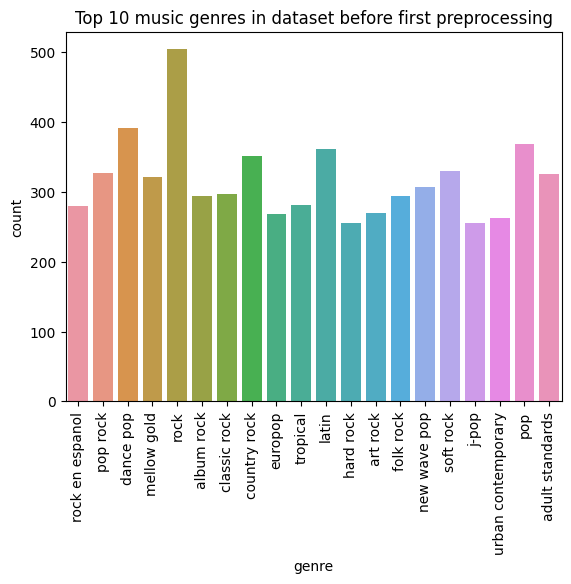

In [241]:
df = pd.DataFrame({'genre': flatten_genres_before})

genre_counts = flatten_genres_before.value_counts()
genre_counts = genre_counts[:20]

df = df[df['genre'].isin(genre_counts.index)]
sns.countplot(x='genre', data=df)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=10)
plt.title('Top 10 music genres in dataset before first preprocessing')

# Display the chart
plt.show()

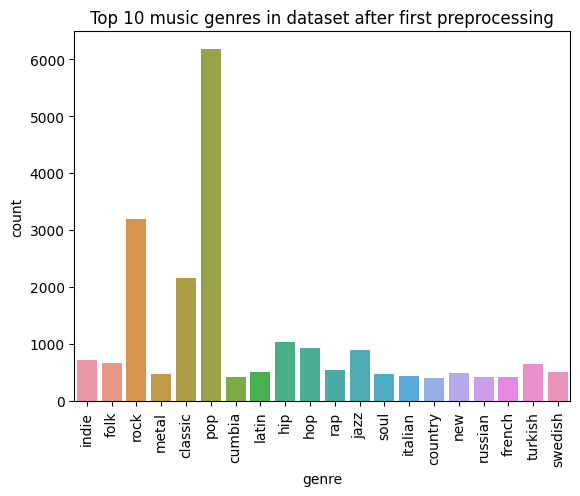

In [242]:
df = pd.DataFrame({'genre': flatten_genres_after})

genre_counts = flatten_genres_after.value_counts()
genre_counts = genre_counts[:20]

df = df[df['genre'].isin(genre_counts.index)]
sns.countplot(x='genre', data=df)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=10)
plt.title('Top 10 music genres in dataset after first preprocessing')

# Display the chart
plt.show()

Widzimy, że przed zastosowaniem pierwszego preprocessingu, mieliśmy 750 pojedynczych wystąpień gatunków. Po zastosowaniu, mamy 392 pojedynczych gatunków. Możemy zauważyć także, że mamy wzrost w liczbie gatunków typu: pop, rock, classic, hip-hop/rap (mamy oddzielnie hip i hop oraz rap, ale liczymy to sumarycznie). Możemy zauważyć jednak, że po preprocessingu występują gatunki, typu "turkish" czy "russian", co oczywiście nie jest gatunkiem muzyki. Możliwe, że takie gatunki, występują razem z jakimś "kluczowym gatunkiem", przykładowo otrzymaliśmy listy w postaci: ['italian', 'hip-hop'].

In [243]:
def check_occurences(_list):
    occurence = 'rock'
    for element in _list:
        if element == occurence:
            print(_list)
        else:
            continue

In [244]:
artists_df_without_duplicates_preprocessed['genres'].apply(check_occurences)

['rock', 'nacional']
['rock']
['rock']
['rock']
['argentine', 'rock']
['chilean', 'rock', 'nueva', 'trova']
['rock', 'nacional']
['rock', 'latin']
['argentine', 'metal', 'rock']
['croatian', 'rock']
['croatian', 'rock']
['narodna', 'muzika', 'sevdah', 'yugoslav', 'rock']
['australian', 'rock']
['australian', 'rock']
['australian', 'rock']
['rock']
['australian', 'rock']
['australian', 'rock']
['australian', 'rock']
['australian', 'rock']
['australian', 'rock']
['australian', 'rock']
['australian', 'rock']
['australian', 'rock']
['australian', 'rock', 'double', 'drumming']
['australian', 'rock']
['australian', 'rock']
['australian', 'rock']
['australian', 'rock']
['australian', 'rock']
['australian', 'rock']
['australian', 'alternative', 'rock']
['australian', 'rock']
['australian', 'rock']
['australian', 'rock']
['australian', 'rock']
['australian', 'pop', 'rock']
['australian', 'rock']
['australian', 'alternative', 'rock', 'melodic', 'hardcore', 'skate', 'punk']
['australian', 'rock']

0        None
1        None
2        None
3        None
4        None
         ... 
27411    None
27412    None
27413    None
27414    None
27415    None
Name: genres, Length: 27416, dtype: object

Powyższe podejście okazuje się niewystarczające i dodaje zbyt wiele komplikacji, z tego powodu, że preprocessing zwrócił zbyt wiele "pozostałości" po podgatunkach wraz z głównymi gatunkami, typu "australian" występuje razem z "rock" itp. Spróbujmy zastosować inne podejście, w którym określimy główne gatunki i przypiszemy odpowiadające im podgatunki. Wzorujemy się na liście gatunków i należących do nich podgatunków ze strony: https://www.chosic.com/list-of-music-genres/ 

W słowniku genres.json, definiujemy główne gatunki jako klucze, a odpowiadające im podgatunki jako wartości.

Dodatkowo, poniższy skrypt pomógł w generacji możliwych kombinacji podgatunków, przykładowo, jeśli w liście podgatunków znajdował się "pop dance", to powyższy skrypt wygeneruje "dance pop". Jeśli liczba białych znaków w wyrazie jest większa niż jeden, to zostanie utworzony tylko jeden dodatkowy podgatunek, przykładowo "spanish pop rock" da nam "rock pop spanish" (zamiana wyrazów skrajnych).

In [245]:
def generate_combinations(words):
    combinations = []
    for word in words:
        if ' ' in word:
            subwords = word.split(' ')
            combination = ' '.join(subwords)
            combinations.append(combination)
            combination = ' '.join(reversed(subwords))
            combinations.append(combination)
        else:
            combinations.append(word)
    return combinations


In [310]:
words = ["classical", "romantic", "classical performance", "early music", "late romantic era", "baroque", "early modern classical", "post-romantic era", "orchestra", "classical piano", "avant-garde", "choral", "renaissance", "early music ensemble", "contemporary classical", "impressionism", "german romanticism", "orchestral performance", "classical era", "early music choir", "early romantic era", "italian baroque", "italian romanticism", "neoclassicism", "italian opera", "compositional", "ambient", "opera", "german baroque", "french romanticism", "british orchestra", "polyphony", "violin", "french opera", "baroque ensemble", "russian classical piano", "american orchestra", "madrigal", "french baroque", "english baroque", "medieval", "piano", "american modern classical", "czech classical", "vocal ensemble", "string quartet", "franco-flemish school", "russian modern classical", "classical soprano", "operetta", "serialism", "italian renaissance", "free improvisation", "english renaissance", "minimalism", "british choir", "american contemporary classical", "german orchestra", "historically informed performance", "british modern classical", "viola da gamba", "musica antigua", "russian romanticism", "laboratorio", "austro-german modernism", "norwegian classical", "lute", "german classical piano", "polish classical", "classical cello", "galante era", "acousmatic", "musique ancienne", "anglican liturgy", "hungarian classical performance", "german opera", "radio symphony", "chamber orchestra", "french classical piano", "hungarian classical piano", "bohemian baroque", "finnish classical", "modern performance", "latin american classical piano", "american classical piano", "classical guitar", "polish classical piano", "italian classical piano", "classical tenor", "experimental", "historic piano performance", "classical organ", "caucasian classical", "early avant garde", "hungarian contemporary classical", "classical baritone", "victorian britain", "post-minimalism", "harpsichord", "german renaissance", "austrian orchestra", "polish contemporary classical", "american early music", "drone", "nordic contemporary classical", "modern string quartet", "russian contemporary classical", "21st century classical", "microtonal", "bow pop", "wind symphony", "israeli classical piano", "streichquartett", "outsider", "nordic orchestra", "art song", "finnish contemporary classical", "tzadik", "classical mezzo-soprano", "ukrainian classical", "guitarra clasica", "classical clarinet", "historic orchestral performance", "latin classical"]
combinations = generate_combinations(words)
print(combinations)


['classical', 'romantic', 'classical performance', 'performance classical', 'early music', 'music early', 'late romantic era', 'era romantic late', 'baroque', 'early modern classical', 'classical modern early', 'post-romantic era', 'era post-romantic', 'orchestra', 'classical piano', 'piano classical', 'avant-garde', 'choral', 'renaissance', 'early music ensemble', 'ensemble music early', 'contemporary classical', 'classical contemporary', 'impressionism', 'german romanticism', 'romanticism german', 'orchestral performance', 'performance orchestral', 'classical era', 'era classical', 'early music choir', 'choir music early', 'early romantic era', 'era romantic early', 'italian baroque', 'baroque italian', 'italian romanticism', 'romanticism italian', 'neoclassicism', 'italian opera', 'opera italian', 'compositional', 'ambient', 'opera', 'german baroque', 'baroque german', 'french romanticism', 'romanticism french', 'british orchestra', 'orchestra british', 'polyphony', 'violin', 'frenc

Teraz, załadujmy finalny słownik z gatunkami i podgatunkami, oraz przeprowadźmy upraszczanie gatunków artystów

In [277]:
import json
with open('genres.json', 'r') as file:
    genres = json.load(file)

In [278]:
genres

{'pop': ['pop',
  'acoustic pop',
  'pop acoustic',
  'arab pop',
  'pop arab',
  'art pop',
  'pop art',
  'c-pop',
  'classify',
  'dance pop',
  'pop dance',
  'electropop',
  'escape room',
  'room escape',
  'europop',
  'hip pop',
  'pop hip',
  'hyperpop',
  'indie cafe pop',
  'pop cafe indie',
  'indie electropop',
  'electropop indie',
  'indie pop',
  'pop indie',
  'indie poptimism',
  'poptimism indie',
  'j-pop',
  'k-pop',
  'latin pop',
  'pop latin',
  'levenslied',
  'metropopolis',
  'mexican pop',
  'pop mexican',
  'neo mellow',
  'mellow neo',
  'new romantic',
  'romantic new',
  'new wave pop',
  'pop wave new',
  'pop dance',
  'dance pop',
  'pop edm',
  'edm pop',
  'pop r&b',
  'r&b pop',
  'pop rap',
  'rap pop',
  'pop rock',
  'rock pop',
  'post-teen pop',
  'pop post-teen',
  'social media pop',
  'pop media social',
  'soft rock',
  'rock soft',
  'sophisti-pop',
  'talent show',
  'show talent',
  'teen pop',
  'pop teen',
  'turkish pop',
  'pop turk

In [279]:
subgenres = ['rock', 'pop', 'rap', 'jazz', 'classical', 'funk', 'latin', 'dance', 'electronic', 'r&b', 'country', 'folk', 'acoustic', 'metal', 'pop rock', 'rock pop']

import re

def detect_and_expand_genres(subgenres):
    expanded_genre_list = []
    for genre in subgenres:
        for main_genre, subgenres in genres.items():
            if genre in subgenres:
                expanded_genre_list.append(main_genre)
                break
        else:
            expanded_genre_list.append(genre)
    return expanded_genre_list


In [280]:
artists_df_without_duplicates_preprocessed = artists_df_without_duplicates.copy()

In [281]:
artists_df_without_duplicates_preprocessed['genres']

0           [filmi, indian folk, indian rock, kannada pop]
1        [desi pop, hindi indie, indian indie, indian r...
2                                            [indian folk]
3        [opm, pinoy hip hop, pinoy r&b, pinoy trap, ta...
4        [hindi indie, indian indie, indian singer-song...
                               ...                        
27411                                    [italian hip hop]
27412                                        [belgian pop]
27413                                         [thai indie]
27414                                         [thai indie]
27415                                         [indie folk]
Name: genres, Length: 27416, dtype: object

In [282]:
artists_df_without_duplicates_preprocessed['genres'] = artists_df_without_duplicates_preprocessed['genres'].apply(detect_and_expand_genres)

In [283]:
flatten_genres_before = flatten_series(artists_df_without_duplicates['genres'])
flatten_genres_after = flatten_series(artists_df_without_duplicates_preprocessed['genres'])

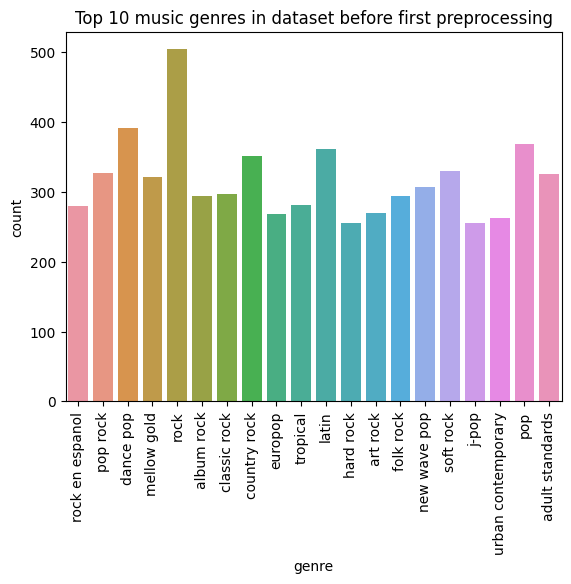

In [284]:
df = pd.DataFrame({'genre': flatten_genres_before})

genre_counts = flatten_genres_before.value_counts()
genre_counts = genre_counts[:20]

df = df[df['genre'].isin(genre_counts.index)]
sns.countplot(x='genre', data=df)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=10)
plt.title('Top 10 music genres in dataset before first preprocessing')

# Display the chart
plt.show()

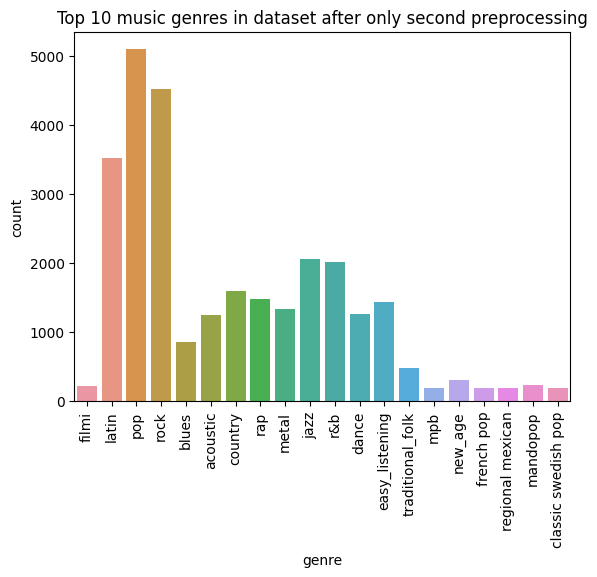

In [285]:
df = pd.DataFrame({'genre': flatten_genres_after})

genre_counts = flatten_genres_after.value_counts()
genre_counts = genre_counts[:20]

df = df[df['genre'].isin(genre_counts.index)]
sns.countplot(x='genre', data=df)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=10)
plt.title('Top 10 music genres in dataset after only second preprocessing')

# Display the chart
plt.show()

In [309]:
flatten_genres_after.value_counts()[0:50]

pop                    5092
rock                   4510
latin                  3518
jazz                   2060
r&b                    2008
country                1598
rap                    1479
easy_listening         1431
metal                  1341
dance                  1257
acoustic               1247
blues                   850
traditional_folk        482
new_age                 303
mandopop                233
filmi                   218
regional mexican        198
classic swedish pop     196
mpb                     194
french pop              192
chanson                 186
classic iskelma         183
indonesian pop          182
iskelma                 180
opm                     178
classic finnish pop     177
thai pop                175
swedish pop             173
danish pop              170
j-rock                  169
classic mandopop        169
j-poprock               168
classic soul            168
italian adult pop       166
classic italian pop     163
punk                

Możemy zauważyć, że drugi preprocessing pozwolił na lepszą kategoryzację grup. Mamy jednak przewagę gatunków typu pop, rock i latin w naszym zbiorze. Spróbujmy zastosować teraz pierwszy preprocessing po drugim preprocessingu. 

In [288]:
artists_df_without_duplicates_preprocessed_second = artists_df_without_duplicates_preprocessed.copy()

In [292]:
artists_df_without_duplicates_preprocessed_second['genres'] = artists_df_without_duplicates_preprocessed_second['genres'].apply(split_words)

In [293]:
artists_df_without_duplicates_preprocessed_second['genres'].apply(maximize_subgenres)

0                   [indian]
1                    [indie]
2             [indian, folk]
3                    [pinoy]
4            [indie, indian]
                ...         
27411    [italian, hip, hop]
27412         [belgian, pop]
27413          [thai, indie]
27414          [thai, indie]
27415             [acoustic]
Name: genres, Length: 27416, dtype: object

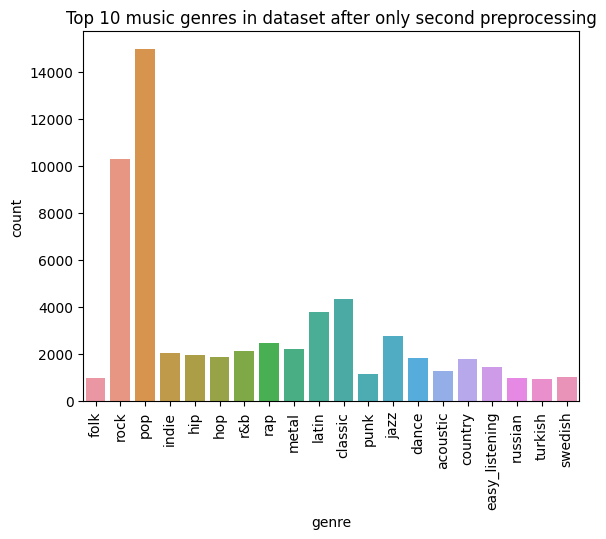

In [294]:
flatten_genres_after_both = flatten_series(artists_df_without_duplicates_preprocessed_second['genres'])
df = pd.DataFrame({'genre': flatten_genres_after_both})

genre_counts = flatten_genres_after_both.value_counts()
genre_counts = genre_counts[:20]

df = df[df['genre'].isin(genre_counts.index)]
sns.countplot(x='genre', data=df)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=10)
plt.title('Top 10 music genres in dataset after only second preprocessing')

# Display the chart
plt.show()

In [295]:
flatten_genres_after_both.value_counts()

pop          14967
rock         10306
classic       4356
latin         3807
jazz          2768
             ...  
g                1
cambodian        1
dizi             1
bloco            1
neo-kraut        1
Length: 1977, dtype: int64

Po zastosowaniu pierwszego preprocessingu zmniejszyła się liczba gatunków, ale zwiększyła się nieróżnorodność tych gatunków w zbiorze.
Decyzja, jaką podejmujemy, to poprawienie drugiego preprocessingu, czyli dodanie odpowiednich subgatunków, które pozostały ręcznie do głównych kategorii.

In [301]:
flatten_genres_after.value_counts().head(40)

pop                    5092
rock                   4510
latin                  3518
jazz                   2060
r&b                    2008
country                1598
rap                    1479
easy_listening         1431
metal                  1341
dance                  1257
acoustic               1247
blues                   850
traditional_folk        482
new_age                 303
mandopop                233
filmi                   218
regional mexican        198
classic swedish pop     196
mpb                     194
french pop              192
chanson                 186
classic iskelma         183
indonesian pop          182
iskelma                 180
opm                     178
classic finnish pop     177
thai pop                175
swedish pop             173
danish pop              170
j-rock                  169
classic mandopop        169
j-poprock               168
classic soul            168
italian adult pop       166
classic italian pop     163
punk                

Wnioski, podgatunek przypisany do głównego gatunku:
* mandopop -> traditional_folk
* classic mandopop -> traditional_folk
* filmi -> traditional_folk
* regional mexican -> latin
* mpb -> jazz
* chanson -> easy_listening
* classic iskelma -> traditional_folk
* indonesian pop -> traditional_folk
* classic soul -> blues
* nu jazz -> jazz
* cantautor -> folk

Dodatkowo, ze względu na małą liczebność zbioru "classical" (około 100 wystąpień), poszerzamy listę podgatunków należących do gatunku classical.


In [311]:
import json
with open('new_genres.json', 'r') as file:
    genres = json.load(file)

In [337]:
for key in genres.keys():
    print(f"{key}, length of subgenres list: {len(genres[key])}")

pop, length of subgenres list: 68
dance, length of subgenres list: 73
rap, length of subgenres list: 53
r&b, length of subgenres list: 29
latin, length of subgenres list: 61
rock, length of subgenres list: 60
metal, length of subgenres list: 60
country, length of subgenres list: 70
acoustic, length of subgenres list: 37
classical, length of subgenres list: 217
jazz, length of subgenres list: 77
blues, length of subgenres list: 54
easy_listening, length of subgenres list: 30
new_age, length of subgenres list: 27
traditional_folk, length of subgenres list: 60


In [342]:
artists_df_without_duplicates_preprocessed_third = artists_df_without_duplicates.copy()

In [343]:
import re
def detect_and_expand_genres(subgenres):
    expanded_genre_list = []
    for genre in subgenres:
        for main_genre, subgenres in genres.items():
            if genre in subgenres:
                expanded_genre_list.append(main_genre)
                break
        else:
            expanded_genre_list.append(genre)
    return expanded_genre_list

In [344]:
artists_df_without_duplicates_preprocessed_third['genres'] = artists_df_without_duplicates_preprocessed_third['genres'].apply(detect_and_expand_genres)

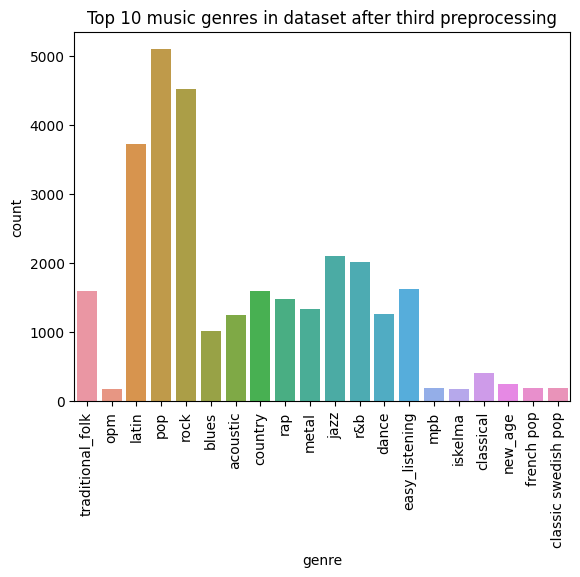

In [345]:
flatten_genres_after_third_preprocessing = flatten_series(artists_df_without_duplicates_preprocessed_third['genres'])
df = pd.DataFrame({'genre': flatten_genres_after_third_preprocessing})

genre_counts = flatten_genres_after_third_preprocessing.value_counts()
genre_counts = genre_counts[:20]

df = df[df['genre'].isin(genre_counts.index)]
sns.countplot(x='genre', data=df)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=10)
plt.title('Top 10 music genres in dataset after third preprocessing')

# Display the chart
plt.show()

In [346]:
flatten_genres_after_third_preprocessing.value_counts().head(20)

pop                    5092
rock                   4510
latin                  3716
jazz                   2106
r&b                    2008
easy_listening         1617
traditional_folk       1600
country                1598
rap                    1479
metal                  1341
dance                  1257
acoustic               1247
blues                  1018
classical               406
new_age                 252
classic swedish pop     196
mpb                     194
french pop              192
iskelma                 180
opm                     178
dtype: int64

In [347]:
genre_counts = flatten_genres_after_third_preprocessing.value_counts()

Zwiększyliśmy prawie czterokrotnie wielkość zbioru classical. W porównaniu z innymi gatunkami, jest to wciąż mała liczba. 
Sprawdźmy jak otrzymane wartości danych gatunków korelują z długością listy podgatunków przypisanych do każdego głównego gatunku.

In [348]:
for key in genres.keys():
    print(f"{key}, length of subgenres list: {len(genres[key])}, count of genres in dataset: {genre_counts[key]}")

pop, length of subgenres list: 68, count of genres in dataset: 5092
dance, length of subgenres list: 73, count of genres in dataset: 1257
rap, length of subgenres list: 53, count of genres in dataset: 1479
r&b, length of subgenres list: 29, count of genres in dataset: 2008
latin, length of subgenres list: 61, count of genres in dataset: 3716
rock, length of subgenres list: 60, count of genres in dataset: 4510
metal, length of subgenres list: 60, count of genres in dataset: 1341
country, length of subgenres list: 70, count of genres in dataset: 1598
acoustic, length of subgenres list: 37, count of genres in dataset: 1247
classical, length of subgenres list: 217, count of genres in dataset: 406
jazz, length of subgenres list: 77, count of genres in dataset: 2106
blues, length of subgenres list: 54, count of genres in dataset: 1018
easy_listening, length of subgenres list: 30, count of genres in dataset: 1617
new_age, length of subgenres list: 27, count of genres in dataset: 252
tradition

Widzimy, że długość listy podgatunków nie zawsze decyduje o liczności otrzymanych głównych gatunków po preprocessingu. Przykładowo, gatunek "dance", ma więcej podgatunków w liście, ale liczność gatunku po preprocessingu jest prawie 4 razy mniejsza niż w przypadku "pop", który miał o 5 podgatunków mniej w liście.

Jednocześnie, gdy zwiększyliśmy ilość podgatunków zaliczających się do gatunku "classical" (wcześniej mieliśmy 52 podgatunki i zwiększyliśmy do 217), otrzymaliśmy prawie 4 krotny wzrost wystąpień gatunku "classical" - 406. Jest to nadal mała liczba w porównaniu do gatunków o największej ilości wystąpień - bardzo możliwym jest fakt, że obecnie muzyka klasyczna występuje bardzo rzadko jako odrębny gatunek wykonywany przez artystów, zwykle jest to połączenie muzyki klasycznej z innymi podgatunkami, tworząc podgatunki/gatunki typu "ambient" czy "new age".

Utworzymy ostatnią, trzecią listę gatunków, w których dodamy odpowiednio:

In [359]:
list(genres.keys())

['pop',
 'dance',
 'rap',
 'r&b',
 'latin',
 'rock',
 'metal',
 'country',
 'acoustic',
 'classical',
 'jazz',
 'blues',
 'easy_listening',
 'new_age',
 'traditional_folk']

In [361]:
def checking_main_genre(_list):
    genres_keys = list(genres.keys())
    for element in _list:
        for genre_key in genres_keys:
            if element == genre_key:
                return True
    return False

In [362]:
artists_df_without_duplicates_preprocessed_third['is_main_genre_in_genres'] = artists_df_without_duplicates_preprocessed_third['genres'].apply(checking_main_genre)

In [366]:
artists_df_without_duplicates_preprocessed_third["is_main_genre_in_genres"].value_counts()

False    16483
True     10933
Name: is_main_genre_in_genres, dtype: int64

In [365]:
artists_df_without_duplicates_preprocessed_third[artists_df_without_duplicates_preprocessed_third["is_main_genre_in_genres"] == True]

,index,id,name,genres,is_main_genre_in_genres
0,0,72578usTM6Cj5qWsi471Nc,Raghu Dixit,"[traditional_folk, indian folk, indian rock, k...",True
28,28,0SJy1J0FgP21lbvGBMKT8H,Camila Moreno,"[chilean indie, chilean rock, latin, nueva can...",True
34,34,6Hs8U0JO2nacXFG4kp15Co,Chico Trujillo,"[latin, chilean rock, cumbia chilena, latin, l...",True
38,38,7FGAi3mSjLMsq6p8SErsTA,Cabezones,"[argentine metal, argentine rock, latin metal,...",True
68,68,0Xsv9BPJp7MEEsQb90zkjN,Al-X,"[pop, pop]",True
...,...,...,...,...,...
27400,27508,4RYmgwfh5Wjcm8L9ge1MFK,Chris Mills,[country],True
27402,27510,3xU9SGbqqwKMkb4VebrgmY,Eleven Hundred Springs,"[country, roots americana, country]",True
27404,27512,2MG46ekjBSFwPgzoIZvHFU,Keira Knightley,[easy_listening],True
27405,27513,2JXDwIo5HsiwTcTPQytrZ8,Sponge,"[rock, rock, pop, rock]",True


Widzimy, że mamy także sporo duplikatów w obrębie jednego gatunku. Spróbujmy teraz w obrębie tych gatunków, zastosować preprocessing związany z ograniczeniem rodzajów muzyki na tym zbiorze, w którym znajduje się co najmniej jeden z głównych gatunków.

In [367]:
def maximize_subgenres(genres):
    subgenre_counts = {}
    
    for genre in genres:
        if genre in subgenre_counts:
            subgenre_counts[genre] += 1
        else:
            subgenre_counts[genre] = 1
    
    max_count = max(subgenre_counts.values())
    
    max_subgenres = []
    
    for subgenre, count in subgenre_counts.items():
        if count == max_count:
            max_subgenres.append(subgenre)
    
    return max_subgenres


In [369]:
artists_df_without_duplicates_preprocessed_fourth = artists_df_without_duplicates_preprocessed_third[artists_df_without_duplicates_preprocessed_third["is_main_genre_in_genres"] == True]

In [370]:
artists_df_without_duplicates_preprocessed_fourth

,index,id,name,genres,is_main_genre_in_genres
0,0,72578usTM6Cj5qWsi471Nc,Raghu Dixit,"[traditional_folk, indian folk, indian rock, k...",True
28,28,0SJy1J0FgP21lbvGBMKT8H,Camila Moreno,"[chilean indie, chilean rock, latin, nueva can...",True
34,34,6Hs8U0JO2nacXFG4kp15Co,Chico Trujillo,"[latin, chilean rock, cumbia chilena, latin, l...",True
38,38,7FGAi3mSjLMsq6p8SErsTA,Cabezones,"[argentine metal, argentine rock, latin metal,...",True
68,68,0Xsv9BPJp7MEEsQb90zkjN,Al-X,"[pop, pop]",True
...,...,...,...,...,...
27400,27508,4RYmgwfh5Wjcm8L9ge1MFK,Chris Mills,[country],True
27402,27510,3xU9SGbqqwKMkb4VebrgmY,Eleven Hundred Springs,"[country, roots americana, country]",True
27404,27512,2MG46ekjBSFwPgzoIZvHFU,Keira Knightley,[easy_listening],True
27405,27513,2JXDwIo5HsiwTcTPQytrZ8,Sponge,"[rock, rock, pop, rock]",True


In [372]:
artists_df_without_duplicates_preprocessed_fourth['genres'] = artists_df_without_duplicates_preprocessed_fourth['genres'].apply(maximize_subgenres)

C:\Users\rwole\AppData\Local\Temp\ipykernel_9508\3435975106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artists_df_without_duplicates_preprocessed_fourth['genres'] = artists_df_without_duplicates_preprocessed_fourth['genres'].apply(maximize_subgenres)


In [373]:
artists_df_without_duplicates_preprocessed_fourth

,index,id,name,genres,is_main_genre_in_genres
0,0,72578usTM6Cj5qWsi471Nc,Raghu Dixit,"[traditional_folk, indian folk, indian rock, k...",True
28,28,0SJy1J0FgP21lbvGBMKT8H,Camila Moreno,"[chilean indie, chilean rock, latin, nueva can...",True
34,34,6Hs8U0JO2nacXFG4kp15Co,Chico Trujillo,[latin],True
38,38,7FGAi3mSjLMsq6p8SErsTA,Cabezones,"[argentine metal, argentine rock, latin metal,...",True
68,68,0Xsv9BPJp7MEEsQb90zkjN,Al-X,[pop],True
...,...,...,...,...,...
27400,27508,4RYmgwfh5Wjcm8L9ge1MFK,Chris Mills,[country],True
27402,27510,3xU9SGbqqwKMkb4VebrgmY,Eleven Hundred Springs,[country],True
27404,27512,2MG46ekjBSFwPgzoIZvHFU,Keira Knightley,[easy_listening],True
27405,27513,2JXDwIo5HsiwTcTPQytrZ8,Sponge,[rock],True


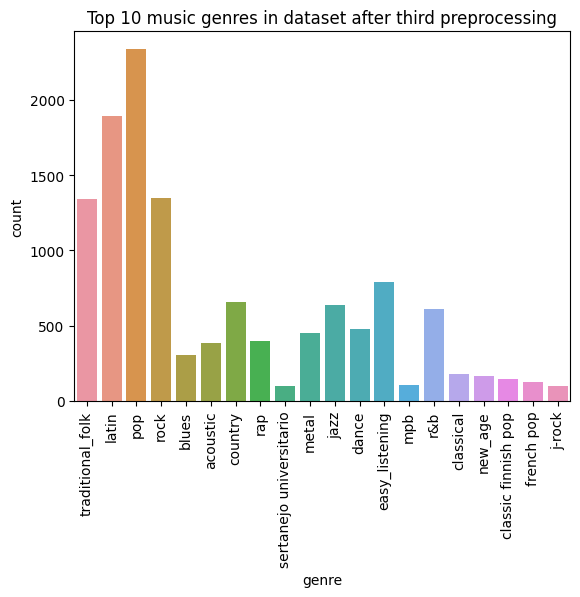

In [374]:
flatten_genres_after_fourth_preprocessing = flatten_series(artists_df_without_duplicates_preprocessed_fourth['genres'])
df = pd.DataFrame({'genre': flatten_genres_after_fourth_preprocessing})

genre_counts = flatten_genres_after_fourth_preprocessing.value_counts()
genre_counts = genre_counts[:20]

df = df[df['genre'].isin(genre_counts.index)]
sns.countplot(x='genre', data=df)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=10)
plt.title('Top 10 music genres in dataset after third preprocessing')

# Display the chart
plt.show()